## Готовим данные

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('02_titanic_train.csv')

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [106]:
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [107]:
df = df[~df['Age'].isnull()]

In [108]:
df.shape

(714, 7)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [110]:
y = df['Survived']

In [111]:
df = df.drop(['Survived'], axis=1)

## А где же машинное обучение?

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(df, y)
predict = dtc.predict(df)

In [113]:
predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1,

In [114]:
# Но как сравнить? Как понять хорошо мы отработали или не очень?

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y,predict)

1.0

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
precision_score(y, predict)

1.0

In [119]:
recall_score(y, predict)

1.0

In [120]:
## Так ли хорошо работает модель?

In [121]:
from sklearn.cross_validation import train_test_split

![Image](http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png)

In [122]:
from sklearn.cross_validation import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [124]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

In [125]:
accuracy_score(y_test,predict)

0.63135593220338981

In [126]:
precision_score(y_test, predict)

0.55660377358490565

In [127]:
recall_score(y_test, predict)

0.59595959595959591

In [128]:
from sklearn.metrics import f1_score

In [129]:
f1_score(y_test, predict)

0.57560975609756093

In [130]:
from sklearn.metrics import accuracy_score, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.556603773585
recall 0.59595959596
accuracy 0.631355932203
f1 0.575609756098


In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.631578947368
recall 0.484848484848
accuracy 0.665254237288


In [132]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict_proba(X_test)

In [133]:
predict

array([[ 0.5,  0.5],
       [ 0. ,  1. ],
       [ 0.5,  0.5],
       [ 0.2,  0.8],
       [ 0.9,  0.1],
       [ 0.1,  0.9],
       [ 0.6,  0.4],
       [ 0.6,  0.4],
       [ 0.7,  0.3],
       [ 0.8,  0.2],
       [ 0.6,  0.4],
       [ 0.5,  0.5],
       [ 0.3,  0.7],
       [ 1. ,  0. ],
       [ 0.3,  0.7],
       [ 0.5,  0.5],
       [ 0.7,  0.3],
       [ 0.2,  0.8],
       [ 0.5,  0.5],
       [ 0.6,  0.4],
       [ 0.7,  0.3],
       [ 0.9,  0.1],
       [ 0.1,  0.9],
       [ 0.3,  0.7],
       [ 0.6,  0.4],
       [ 0.4,  0.6],
       [ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0.4,  0.6],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.6,  0.4],
       [ 0.3,  0.7],
       [ 1. ,  0. ],
       [ 0.7,  0.3],
       [ 0.8,  0.2],
       [ 0.5,  0.5],
       [ 0.8,  0.2],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.4,  0.6],
       [ 0.9,  0.1],
       [ 0.1,  0.9],
       [ 0.7,  0.3],
       [ 0.2,  0.8],
       [ 1. ,  0. ],
       [ 0.6,  0.4],
       [ 0.6,

In [134]:
predict[:,1]

array([ 0.5,  1. ,  0.5,  0.8,  0.1,  0.9,  0.4,  0.4,  0.3,  0.2,  0.4,
        0.5,  0.7,  0. ,  0.7,  0.5,  0.3,  0.8,  0.5,  0.4,  0.3,  0.1,
        0.9,  0.7,  0.4,  0.6,  0.6,  0.8,  0.6,  0.1,  0.1,  0.4,  0.7,
        0. ,  0.3,  0.2,  0.5,  0.2,  0.1,  0.1,  0.6,  0.1,  0.9,  0.3,
        0.8,  0. ,  0.4,  0.4,  0.1,  0.5,  0.6,  0.1,  0.9,  0.2,  0.2,
        0.3,  0.7,  0.6,  0. ,  0.3,  0.5,  0.3,  0.5,  0.3,  0. ,  0.5,
        0.8,  0.9,  0.2,  0.1,  0.3,  0.7,  0.4,  0.3,  0.2,  0.1,  0. ,
        0.3,  0. ,  1. ,  0.1,  0.8,  0.2,  0.3,  0. ,  0.1,  0.1,  0.2,
        0.4,  0.2,  0.1,  0.8,  0.5,  0.1,  0.3,  0.2,  0.8,  1. ,  0.9,
        0.3,  0.9,  0.6,  0.1,  0.4,  0.8,  0.3,  0.2,  1. ,  0.7,  0. ,
        0.4,  0.1,  0.4,  0.3,  0.5,  0.6,  0.7,  0.7,  0.3,  0.1,  0.3,
        0.3,  0.3,  0.7,  0.5,  0. ,  0.3,  0.4,  0.5,  0.2,  0.2,  0. ,
        0.7,  0.5,  0.2,  0.1,  0. ,  0.9,  0. ,  0.2,  0.2,  0.1,  0.5,
        0.5,  0.2,  0.4,  0.1,  0.2,  0.6,  0.4,  0

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
precision, recall, treshhold=precision_recall_curve(y_test,predict[:,1])

In [137]:
precision, recall,treshhold

(array([ 0.41949153,  0.44239631,  0.49189189,  0.51265823,  0.59349593,
         0.65346535,  0.7012987 ,  0.72222222,  0.76470588,  0.70588235,
         0.66666667,  1.        ]),
 array([ 1.        ,  0.96969697,  0.91919192,  0.81818182,  0.73737374,
         0.66666667,  0.54545455,  0.39393939,  0.26262626,  0.12121212,
         0.04040404,  0.        ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [138]:
%matplotlib inline
from matplotlib import pyplot as plt

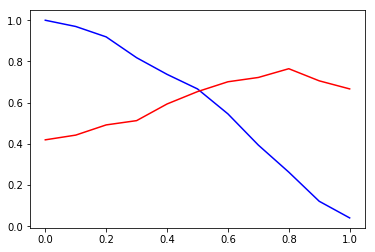

In [139]:
plt.plot(treshhold, recall[0:11], 'b')
plt.plot(treshhold, precision[0:11], 'r')

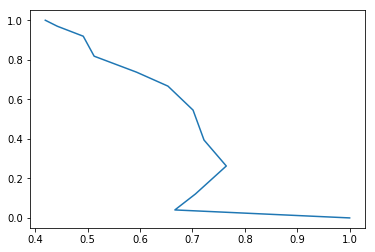

In [140]:
plt.plot(precision,recall)

(-0.01, 1.01)

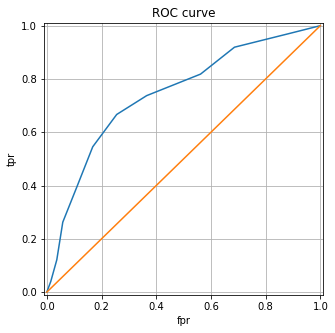

In [141]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [142]:
roc_auc_score(y_test, predict[:,1])

0.7426454324264542

![Image](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [143]:
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([ 0.58380112,  0.51844427,  0.62429832,  0.68484362,  0.67118227,
        0.74220033,  0.82142857,  0.79187192,  0.7770936 ,  0.77175698])

## Вернемся к данным

In [193]:
df = pd.read_csv('02_titanic_train.csv')

In [194]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [196]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [197]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [198]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [199]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [201]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [202]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [203]:
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    df.drop(['Survived'], axis=1),
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([ 0.72      ,  0.78025974,  0.6631016 ,  0.78716578,  0.82139037,
        0.73743316,  0.79812834,  0.71684492,  0.82058824,  0.84041394])